### Cargamos el embedding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DATA_PATH = "csvs/gnn_chess_embeddings.csv"

data = pd.read_csv(DATA_PATH)
print(f"Shape original: {data.shape}")

data = data.dropna()
print(f"Shape después de dropna: {data.shape}")

data.head()

Shape original: (99818, 130)
Shape después de dropna: (99818, 130)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_120,dim_121,dim_122,dim_123,dim_124,dim_125,dim_126,dim_127,player,game_id
0,-0.296503,-0.191236,0.075848,0.130233,0.113395,0.062848,0.017535,0.002886,-0.015625,-0.075051,...,-0.220615,-0.186108,0.224950,0.135178,0.037299,-0.304329,0.085086,-0.113760,Alekhine,tensor([0])
1,-0.342113,-0.199363,-0.159713,0.229924,0.229870,0.161420,-0.064589,0.032225,-0.050654,-0.042166,...,-0.284636,-0.090345,0.211322,0.259435,0.139280,-0.536887,0.329099,-0.146408,Alekhine,tensor([1])
2,-0.226302,-0.174714,-0.072006,0.221936,0.147385,0.088627,0.027806,-0.075993,0.209733,-0.129372,...,-0.270712,-0.107419,0.104504,0.184773,0.099868,-0.472326,0.128366,-0.159114,Alekhine,tensor([2])
3,-0.265954,-0.120163,-0.129802,0.211147,0.053759,0.222618,-0.065259,-0.114219,0.073187,-0.140519,...,-0.349986,-0.123386,0.183206,0.252711,0.260616,-0.498149,0.119784,-0.193729,Alekhine,tensor([3])
4,-0.145549,-0.135810,-0.144198,0.251859,0.131270,0.040419,-0.066895,-0.167195,0.035784,-0.051701,...,-0.236046,0.111503,0.180137,0.287748,0.212282,-0.404562,0.271199,-0.137062,Alekhine,tensor([4])


### Armar vector de embedding

In [3]:
embedding_columns = [f"dim_{i}" for i in range(128)]
data['embedding'] = data[embedding_columns].values.tolist()
X = np.stack(data['embedding'].values)

print("Matriz de embeddings:", X.shape)

Matriz de embeddings: (99818, 128)


### Visualización con UMAP

c:\Users\B\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


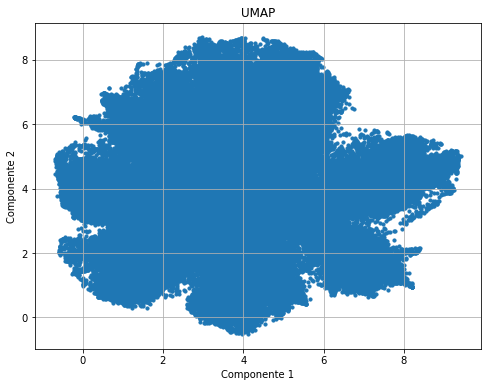

In [4]:
umap_model = umap.UMAP(n_components=2, random_state=3633)
X_2d = umap_model.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=10)
plt.title("UMAP")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()



### Método del codo para elegir `k` en K‑Means

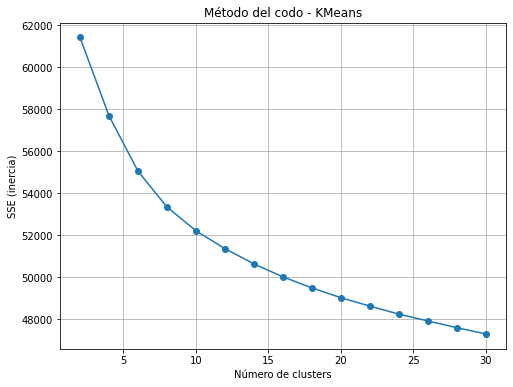

In [5]:
sse = []
K_RANGE = range(2, 31, 2)
for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=3633)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(list(K_RANGE), sse, marker='o')
plt.title("Método del codo - KMeans")
plt.xlabel("Número de clusters")
plt.ylabel("SSE (inercia)")
plt.grid(True)
plt.show()

### Entrenar K‑Means con `k` óptimo y asignar clusters

In [8]:
OPTIMAL_K = 8
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=3633)
data['cluster'] = kmeans.fit_predict(X)
data[['player', 'cluster', "game_id"]]

,player,cluster,game_id
0,Alekhine,4,tensor([0])
1,Alekhine,5,tensor([1])
2,Alekhine,6,tensor([2])
3,Alekhine,5,tensor([3])
4,Alekhine,1,tensor([4])
...,...,...,...
99813,Zukertort,5,tensor([99813])
99814,Zukertort,7,tensor([99814])
99815,Zukertort,4,tensor([99815])
99816,Zukertort,0,tensor([99816])


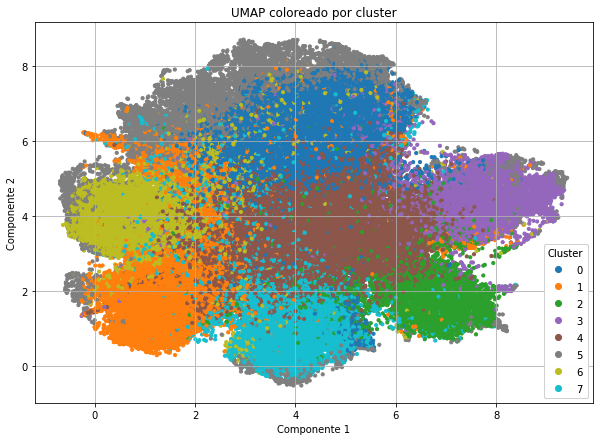

In [9]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=data["cluster"], cmap="tab10", s=10)
plt.title("UMAP coloreado por cluster")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster", loc="best")
plt.gca().add_artist(legend1)
plt.show()

### Evaluación


Evaluando K = 2...
Accuracy para K=2: 14.29%

Evaluando K = 4...
Accuracy para K=4: 36.73%

Evaluando K = 6...
Accuracy para K=6: 63.27%

Evaluando K = 8...
Accuracy para K=8: 71.43%

Evaluando K = 10...
Accuracy para K=10: 79.59%

Evaluando K = 12...
Accuracy para K=12: 77.55%

Evaluando K = 14...
Accuracy para K=14: 81.63%

Evaluando K = 16...
Accuracy para K=16: 83.67%

Evaluando K = 18...
Accuracy para K=18: 83.67%

Evaluando K = 20...
Accuracy para K=20: 85.71%

Evaluando K = 22...
Accuracy para K=22: 81.63%

Evaluando K = 24...
Accuracy para K=24: 79.59%

Evaluando K = 26...
Accuracy para K=26: 87.76%

Evaluando K = 28...
Accuracy para K=28: 87.76%

Evaluando K = 30...
Accuracy para K=30: 85.71%

Evaluando K = 32...
Accuracy para K=32: 87.76%

Evaluando K = 34...
Accuracy para K=34: 89.80%

Evaluando K = 36...
Accuracy para K=36: 87.76%

Evaluando K = 38...
Accuracy para K=38: 81.63%

Evaluando K = 40...
Accuracy para K=40: 87.76%

Evaluando K = 42...
Accuracy para K=42: 83.67%


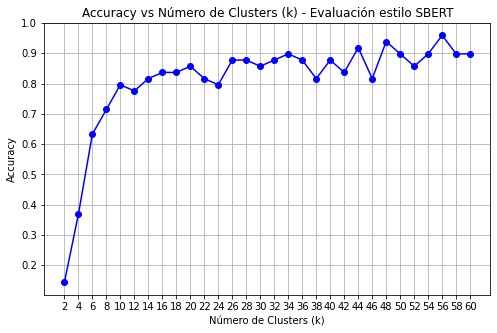

player
Fine           28
Morphy         22
Schlechter     18
Winawer        16
Steinitz       16
Lasker         15
Korchnoi       13
Bogoljubow     13
Botvinnik      12
Rubinstein     11
Nimzowitsch    10
Tarrasch        9
Spassky         9
Staunton        8
Capablanca      7
Philidor        6
Zukertort       6
Pillsbury       5
Alekhine        4
Carlsen         4
Maroczy         3
Chigorin        3
Karpov          3
Bronstein       3
Tal             3
Keres           3
Ivanchuk        2
Najdorf         2
Topalov         2
Leko            2
Gelfand         2
Kamsky          2
Reshevsky       2
Fischer         2
Euwe            2
Smyslov         2
Caruana         2
Kasparov        2
Aronian         1
Timman          1
Karjakin        1
Petrosian       1
Geller          1
Anderssen       1
Portisch        1
Name: correct, dtype: int64

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kmeans_player_identification_with_errors_v3(X_train, train_df, X_test, test_df, k_values):
    results = []
    all_errors = []
    accuracies = []

    for k in k_values:
        print(f"\nEvaluando K = {k}...")

        kmeans = KMeans(n_clusters=k, random_state=3633)
        kmeans.fit(X_train)

        # Asignar clusters
        train_df = train_df.copy()
        train_df["cluster"] = kmeans.labels_
        test_labels = kmeans.predict(X_test)
        test_df = test_df.copy()
        test_df["cluster"] = test_labels

        # Distribución de clusters por jugador
        cluster_dist_train = pd.crosstab(train_df["player"], train_df["cluster"], normalize="index")
        cluster_dist_test = pd.crosstab(test_df["player"], test_df["cluster"], normalize="index")

        # Asegurar misma estructura
        cluster_dist_test = cluster_dist_test.reindex(columns=cluster_dist_train.columns, fill_value=0)

        players_train = cluster_dist_train.index.tolist()
        players_test = cluster_dist_test.index.tolist()

        train_vectors = cluster_dist_train.values
        test_vectors = cluster_dist_test.values

        # Comparar vectores
        sim_matrix = cosine_similarity(test_vectors, train_vectors)
        pred_indices = sim_matrix.argmax(axis=1)
        pred_players = [players_train[idx] for idx in pred_indices]

        # Evaluar
        df_compare = pd.DataFrame({
            "player": players_test,
            "pred_player": pred_players
        })
        df_compare["correct"] = df_compare["player"] == df_compare["pred_player"]
        accuracy_global = df_compare["correct"].mean()*100
        accuracies.append(df_compare["correct"].mean())

        print(f"Accuracy para K={k}: {accuracy_global:.2f}%")

        # Mostrar errores
        errors = df_compare[df_compare["correct"] == False].copy()

        # Guardar resultados
        for player, group in df_compare.groupby("player"):
            acc = group["correct"].mean() * 100
            results.append({"k": k, "player": player, "accuracy_%": acc})

        errors["k"] = k
        all_errors.append(errors)

    results_df = pd.DataFrame(results)
    errors_df = pd.concat(all_errors, ignore_index=True)

    return accuracies, results_df, errors_df


y = data["player"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3633, stratify=y)

train_df = pd.DataFrame({"player": y_train})
test_df = pd.DataFrame({"player": y_test})

k_values = list(range(2, 62, 2))
accuracies, df_results, df_errors = kmeans_player_identification_with_errors_v3(X_train, train_df, X_test, test_df, k_values)

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("Accuracy vs Número de Clusters (k)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Errores por jugador
error_counts = df_errors.groupby("player")["correct"].apply(lambda x: (~x).sum()).sort_values(ascending=False)
error_counts


In [11]:
y = data["player"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3633, stratify=y)

train_df = pd.DataFrame({"player": y_train})
test_df = pd.DataFrame({"player": y_test})

In [34]:
#Mejor Modelo
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=56, random_state=3633)
kmeans.fit(X_train)

train_df = train_df.copy()
train_df["cluster"] = kmeans.labels_


cluster_dist_train = pd.crosstab(train_df["player"], train_df["cluster"], normalize="index")
cluster_dist_test = pd.crosstab(test_df["player"], kmeans.predict(X_test), normalize="index")
cluster_dist_train

cluster,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
player,,,,,,,,,,,,,,,,,,,,,
Alekhine,0.060994,0.016566,0.017319,0.014307,0.013554,0.026355,0.010542,0.024849,0.011295,0.000753,...,0.000753,0.007530,0.000753,0.007530,0.021084,0.016566,0.012801,0.006777,0.013554,0.014307
Anand,0.014877,0.033918,0.013686,0.032728,0.014579,0.022910,0.003570,0.018447,0.010711,0.038084,...,0.005653,0.015174,0.005356,0.006546,0.006248,0.020232,0.020827,0.019339,0.008628,0.031836
Anderssen,0.018382,0.011029,0.044118,0.020221,0.005515,0.007353,0.003676,0.080882,0.003676,0.000000,...,0.000000,0.005515,0.000000,0.011029,0.003676,0.000000,0.011029,0.000000,0.018382,0.016544
Aronian,0.012485,0.020808,0.010526,0.035251,0.013219,0.018115,0.007589,0.026438,0.014933,0.009547,...,0.011016,0.010282,0.008323,0.013709,0.014198,0.024480,0.030355,0.017870,0.005875,0.039902
Bogoljubow,0.035990,0.023136,0.021851,0.007712,0.026992,0.037275,0.010283,0.023136,0.012853,0.002571,...,0.006427,0.006427,0.014139,0.014139,0.007712,0.012853,0.028278,0.010283,0.002571,0.016710
Botvinnik,0.039271,0.016830,0.008415,0.005610,0.032258,0.015428,0.016830,0.015428,0.028050,0.011220,...,0.030856,0.022440,0.029453,0.015428,0.012623,0.021038,0.023843,0.011220,0.011220,0.005610
Bronstein,0.027237,0.013619,0.019455,0.011673,0.016861,0.015564,0.014916,0.011673,0.025292,0.012322,...,0.009079,0.023995,0.033074,0.019455,0.012322,0.018158,0.014916,0.018807,0.025292,0.018158
Capablanca,0.069038,0.016736,0.018828,0.023013,0.027197,0.048117,0.010460,0.012552,0.012552,0.002092,...,0.010460,0.010460,0.000000,0.010460,0.020921,0.012552,0.010460,0.006276,0.006276,0.020921
Carlsen,0.009452,0.029679,0.020038,0.024197,0.013611,0.018715,0.006616,0.023819,0.013233,0.010964,...,0.007940,0.016824,0.007940,0.016068,0.014556,0.028544,0.035728,0.007372,0.005293,0.041966


In [35]:
import pickle
# Guardar el modelo KMeans
with open("kmeans_games.pkl", "wb") as f:
    pickle.dump(kmeans, f)

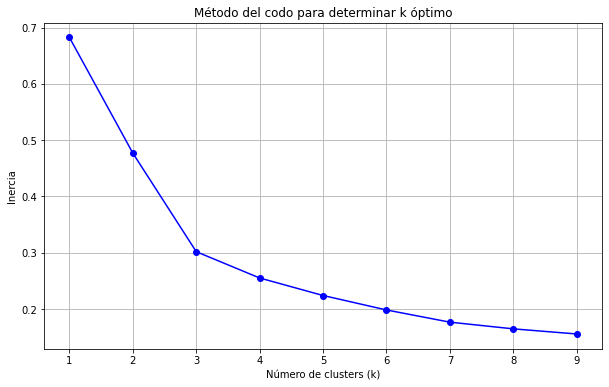

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usamos los vectores de distribución de clusters por jugador
X = cluster_dist_train.values

inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k óptimo')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=10, random_state=3633)
cluster_labels = kmeans_final.fit_predict(cluster_dist_train)

# Añadir los resultados al DataFrame
clustered_players = cluster_dist_train.copy()
clustered_players["cluster"] = cluster_labels

for cluster_id in sorted(clustered_players["cluster"].unique()):
    print(f"\nCluster {cluster_id}:")
    print(clustered_players[clustered_players["cluster"] == cluster_id].index.tolist())


Cluster 0:
['Alekhine', 'Bogoljubow', 'Capablanca', 'Euwe', 'Fine', 'Maroczy', 'Nimzowitsch', 'Rubinstein']

Cluster 1:
['Anderssen', 'Morphy', 'Staunton', 'Steinitz', 'Zukertort']

Cluster 2:
['Philidor']

Cluster 3:
['Anand', 'Aronian', 'Botvinnik', 'Bronstein', 'Carlsen', 'Caruana', 'Fischer', 'Gelfand', 'Geller', 'Ivanchuk', 'Kamsky', 'Karjakin', 'Karpov', 'Kasparov', 'Keres', 'Korchnoi', 'Kramnik', 'Larsen', 'Leko', 'Najdorf', 'Petrosian', 'Polugaevsky', 'Portisch', 'Reshevsky', 'Smyslov', 'Spassky', 'Tal', 'Timman', 'Topalov']

Cluster 4:
['Chigorin', 'Lasker', 'Pillsbury', 'Schlechter', 'Tarrasch', 'Winawer']


In [120]:
cluster_dist_train_clean = cluster_dist_train.drop(["Philidor", "Morphy", "Winawer"], errors="ignore") #quitamos outliers (pocas partidas)


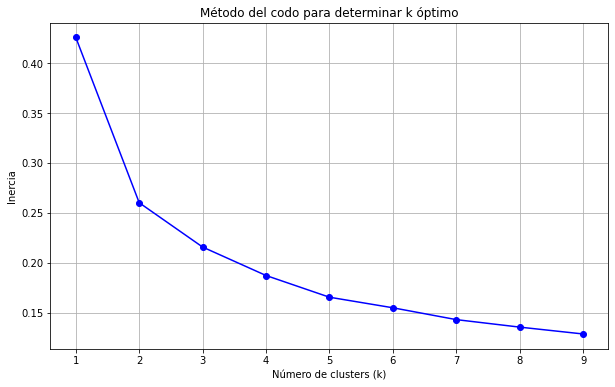

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usamos los vectores de distribución de clusters por jugador
X = cluster_dist_train_clean.values

inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k óptimo')
plt.xticks(k_values)
plt.grid(True)
plt.show()

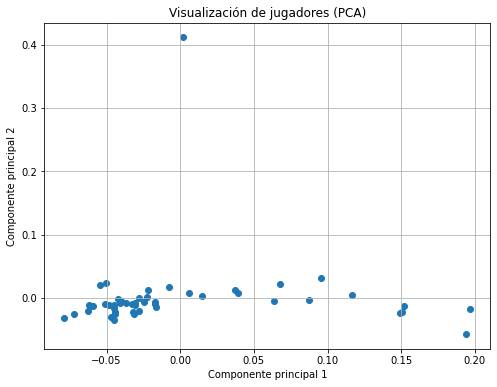

In [130]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
X_players_2d = pca.fit_transform(cluster_dist_train.values)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_players_2d[:, 0], X_players_2d[:, 1])
plt.title("Visualización de jugadores (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

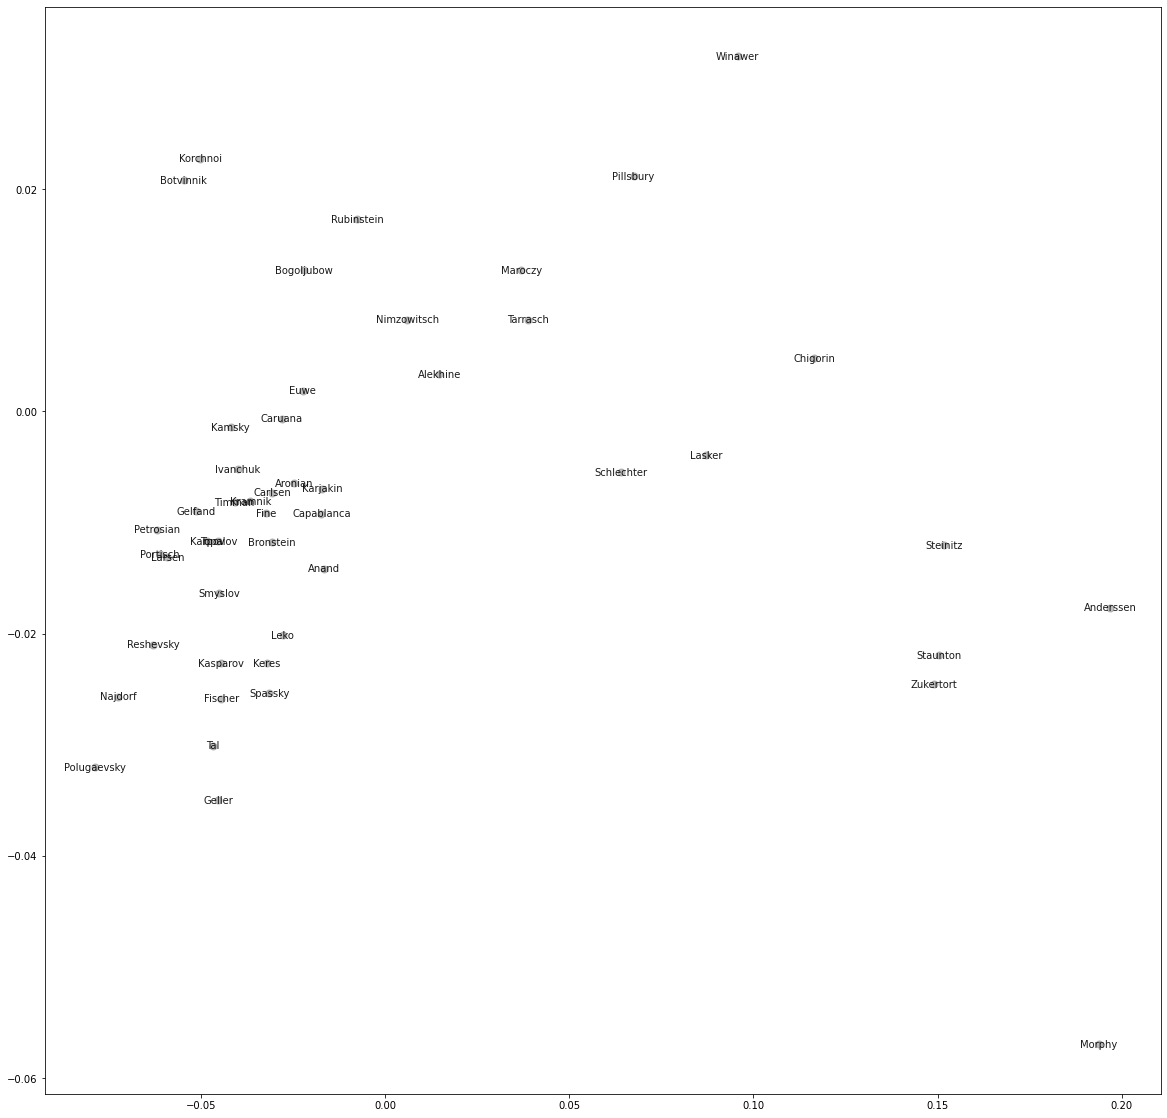

In [142]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir a 2D con PCA
pca = PCA(n_components=2)
X_players_2d = pca.fit_transform(cluster_dist_train.values)

# Supón que es un jugador específico (ej. 'OutlierPlayer')
mask = cluster_dist_train.index != "Philidor"  # Filtrar jugadores específicos
X_players_2d_filtered = X_players_2d[mask]
names_filtered = cluster_dist_train.index[mask]




plt.figure(figsize=(20, 20))
plt.scatter(X_players_2d_filtered[:, 0], X_players_2d_filtered[:, 1], s=50, alpha=0.5, color="gray")

for i, name in enumerate(names_filtered):
    plt.text(
        X_players_2d_filtered[i, 0],
        X_players_2d_filtered[i, 1],
        name,
        fontsize=10,
        ha="center",
        va="center",
        alpha=0.9
    )

In [126]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=6, random_state=3633)
cluster_labels = kmeans_final.fit_predict(cluster_dist_train_clean)

# Añadir los resultados al DataFrame
clustered_players = cluster_dist_train_clean.copy()
clustered_players["cluster"] = cluster_labels
for cluster_id in sorted(clustered_players["cluster"].unique()):
    print(f"\nCluster {cluster_id}:")
    print(clustered_players[clustered_players["cluster"] == cluster_id].index.tolist())



Cluster 0:
['Chigorin', 'Lasker', 'Pillsbury', 'Schlechter', 'Tarrasch']

Cluster 1:
['Botvinnik', 'Gelfand', 'Ivanchuk', 'Karpov', 'Korchnoi', 'Kramnik', 'Larsen', 'Timman']

Cluster 2:
['Anderssen', 'Staunton', 'Steinitz', 'Zukertort']

Cluster 3:
['Bronstein', 'Fischer', 'Geller', 'Kasparov', 'Keres', 'Najdorf', 'Petrosian', 'Polugaevsky', 'Portisch', 'Reshevsky', 'Smyslov', 'Spassky', 'Tal']

Cluster 4:
['Anand', 'Aronian', 'Carlsen', 'Caruana', 'Kamsky', 'Karjakin', 'Leko', 'Topalov']

Cluster 5:
['Alekhine', 'Bogoljubow', 'Capablanca', 'Euwe', 'Fine', 'Maroczy', 'Nimzowitsch', 'Rubinstein']


In [127]:
# Guardar el modelo KMeans final
with open("kmeans_players.pkl", "wb") as f:
    pickle.dump(kmeans_final, f)

In [128]:
cluster_dist_test_clean = cluster_dist_test.drop(["Philidor", "Morphy", "Winawer"], errors="ignore")
cluster_dist_test_clean

col_0,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
player,,,,,,,,,,,,,,,,,,,,,
Alekhine,0.054217,0.018072,0.021084,0.015060,0.030120,0.042169,0.003012,0.015060,0.009036,0.003012,...,0.000000,0.012048,0.006024,0.006024,0.030120,0.015060,0.015060,0.009036,0.012048,0.024096
Anand,0.021429,0.025000,0.015476,0.027381,0.019048,0.017857,0.005952,0.015476,0.010714,0.034524,...,0.003571,0.015476,0.005952,0.007143,0.004762,0.015476,0.015476,0.015476,0.010714,0.038095
Anderssen,0.029412,0.029412,0.044118,0.014706,0.014706,0.014706,0.014706,0.066176,0.000000,0.000000,...,0.000000,0.007353,0.000000,0.036765,0.007353,0.000000,0.044118,0.000000,0.014706,0.022059
Aronian,0.005877,0.020568,0.025465,0.033301,0.009794,0.015671,0.005877,0.019589,0.017630,0.010774,...,0.012733,0.010774,0.012733,0.013712,0.020568,0.026445,0.019589,0.017630,0.005877,0.032321
Bogoljubow,0.041237,0.041237,0.000000,0.005155,0.025773,0.051546,0.005155,0.030928,0.000000,0.005155,...,0.010309,0.000000,0.010309,0.015464,0.015464,0.020619,0.020619,0.010309,0.010309,0.020619
Botvinnik,0.011236,0.000000,0.022472,0.016854,0.028090,0.011236,0.028090,0.000000,0.022472,0.022472,...,0.028090,0.028090,0.016854,0.028090,0.016854,0.044944,0.028090,0.016854,0.005618,0.011236
Bronstein,0.036269,0.010363,0.010363,0.007772,0.018135,0.007772,0.010363,0.010363,0.020725,0.018135,...,0.020725,0.018135,0.018135,0.012953,0.012953,0.023316,0.002591,0.010363,0.028497,0.015544
Capablanca,0.058824,0.008403,0.042017,0.008403,0.008403,0.042017,0.000000,0.008403,0.016807,0.000000,...,0.008403,0.008403,0.000000,0.025210,0.000000,0.000000,0.008403,0.016807,0.000000,0.008403
Carlsen,0.007559,0.024943,0.012094,0.024943,0.010582,0.023432,0.006047,0.030234,0.011338,0.015873,...,0.012850,0.018141,0.005291,0.013605,0.011338,0.025699,0.049131,0.009826,0.003779,0.038549


In [129]:
#predecir los clusters para el conjunto de test
test_labels = kmeans_final.predict(cluster_dist_test_clean)
aciertos = 0
for i in range(len(test_labels)):
    if cluster_labels[i] == test_labels[i]:
        aciertos += 1
accuracy = aciertos / len(test_labels) * 100
print(f"Accuracy del cluster (estilo) para el conjunto de test: {accuracy:.2f}%")


Accuracy del cluster (estilo) para el conjunto de test: 97.83%
